# Shards + gravitational focusing effect
Velocity distribution of the SHM+Shards halo with gravitational focusing effect (see below) on the speed distributions and annual modulation

![title](../plots/plots_png/Lee-GravFocusDiagram.png)

Taken from https://arxiv.org/abs/1308.1953

In [20]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# v range
n = 100
v = linspace(0.1,850.0,n)
day = 58.0 # choose March 1 for maximum grav. focusing effect

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta

# Load shards
df = pandas.read_csv('../Shards.csv')
print df
names = df.ID
nshards = size(names)
velocities = zeros(shape=(nshards,3))
dispersions = zeros(shape=(nshards,3))
velocities[0:(nshards),0] = df.vx # stream velocities
velocities[0:(nshards),1] = df.vy
velocities[0:(nshards),2] = df.vz
dispersions[0:(nshards),0] = df.sigx # dispersion tensors
dispersions[0:(nshards),1] = df.sigy
dispersions[0:(nshards),2] = df.sigz
pops = df.population
pops /= sum(pops) # normalise all populations to 1


# Speed distributions for halo
fv_Iso = SpeedDist_Isotropic(v,day) # Unfocused
fv_Iso_gf = SpeedDist_Isotropic(v,day,GravFocus=True) # Focuses

# Speed distributions for shards
fv = zeros(shape=(nshards,n))
fv_gf = zeros(shape=(nshards,n))
for i in range(0,nshards):
    v_s = velocities[i,:]
    sig_s = dispersions[i,:]
    fv[i,:] = pops[i]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s) # Unfocused
    fv_gf[i,:] = pops[i]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,GravFocus=True) # Focused

         ID       vx       vy       vz     sigx    sigy     sigz  population
0        S1   -8.600 -286.700  -67.900  115.300  49.900   60.000        34.0
1       Rg1   54.100 -393.800   68.300  147.200  45.700  149.400        20.0
2       Rg2   47.800 -254.600   71.800  110.200  27.800  172.100        20.0
3       Rg3   28.000 -275.100   18.000  186.000  62.700  136.500        16.0
4       Rg4  177.600 -287.900  117.900  114.600  46.000  162.700        13.0
5       Rg5  -10.000  -82.300   -0.600   83.200  21.200  162.700        29.0
6       Rg6  -11.900 -222.100   88.000  187.600  44.000  134.900        30.0
7       Rg7  -92.300 -160.200  -33.400  274.600  66.500  178.100        14.0
8        S2  -11.200  159.600 -166.500   65.600  21.900  151.700        73.0
9        C2 -242.400  109.900  180.700  229.200  35.900  236.100        22.0
10    Cand8    8.200  192.000  -25.000  124.000  40.200  186.600        49.0
11    Cand9   48.400  164.500 -171.100  139.600  24.200  172.000        44.0

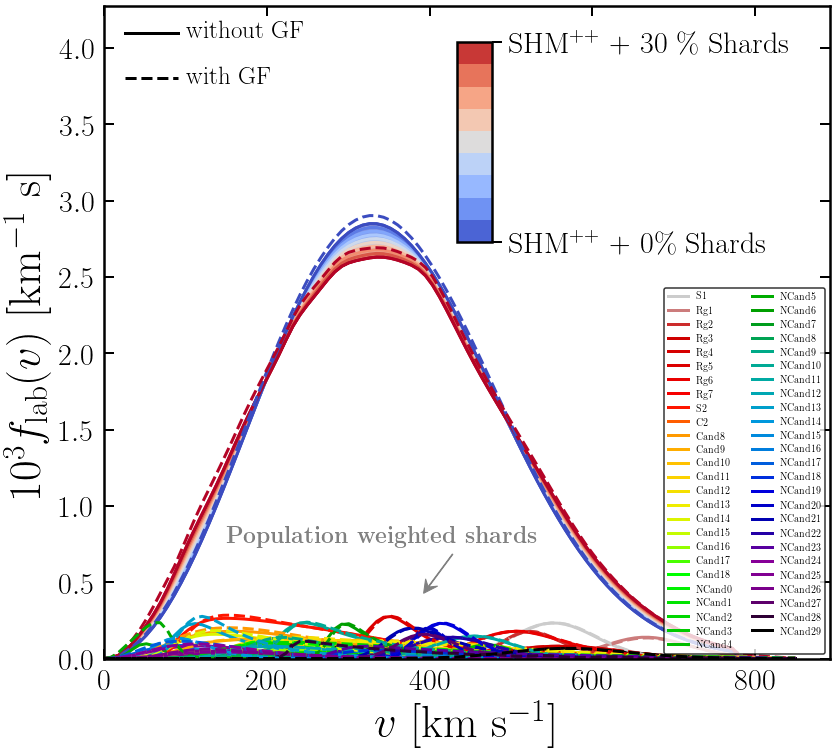

In [27]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_fv_GravFocus'

fv0 = fv_Iso

# Vary shards fraction xi and plot each one
n_xi = 10
xi_vals = linspace(0,0.3,n_xi)
col = (cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm
y2 = 1e3*(xi_vals[-1]*sum(fv,0)+(1.0-xi_vals[-1])*fv0)
for i in range(0,n_xi):
    plt.fill_between(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),'-',color=col[i,:],linewidth=3)

# Plot 0% and 30% distributions
cbar_max = r'SHM$^{++}$ + 30 \% Shards'
cbar_min = r'SHM$^{++}$ + 0\% Shards'
plt.plot(v,1e3*fv0,'-',color=col[0,:],linewidth=3)
plt.plot(v,y2,'-',color=col[-1,:],linewidth=3)

# Plot corrected 0% and 30% distributions
plt.plot(v,1e3*fv_Iso_gf,'--',color=col[0,:],linewidth=3)
plt.plot(v,1e3*(xi_vals[-1]*sum(fv_gf,0)+(1.0-xi_vals[-1])*fv_Iso_gf),'--',color=col[-1,:],linewidth=3)


# Plot individual streams underneath main distributions
colstrs = flipud(cm.nipy_spectral(linspace(0.0,1.0,nshards)))
for i in range(0,nshards):
    plt.plot(v,1e3*fv[i,:],color=colstrs[i,:],linewidth=3,label=names[i]) # Unfocused shards
for i in range(0,nshards):
    plt.plot(v,1e3*fv_gf[i,:],'--',color=colstrs[i,:],linewidth=3) # Focused shards
leg = plt.legend(loc='lower right',fontsize=10,edgecolor='k',ncol=2)
leg.get_frame().set_linewidth(1.5)
    
    
# second "legend" for with/without GF
plt.plot([25,90],[4.1,4.1], 'k-',linewidth=3)
plt.plot([25,90],[3.8,3.8], 'k--',linewidth=3)
plt.text(100,4.1-0.035,'without GF',fontsize=25)
plt.text(100,3.8-0.035,'with GF',fontsize=25)

# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=max(1e3*fv_Iso)*1.5)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"$v$ [km s$^{-1}$]",fontsize=45);
plt.ylabel(r"$10^3 f_{\rm lab}(v)$ [km$^{-1}$ s]",fontsize=45);
plt.text(150,0.75,r'\bf {Population weighted shards}',fontsize=23,color='gray')
plt.arrow(0.48, 0.16, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='gray',facecolor='gray')

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

## Gravitational focusing impact  on annual modulation
- Gravitational focusing adds a separate modulating component due to the overall enhancement in the dark matter density. This adds to the one present due to the relative motion of the halo and the Earth to give two separetly modulating effects

- The focusing is implemented in such a way to spoil the unitarity of $f(v)$, which is interpreted as an enhacement of the dark matter density relative to the value at $\infty$

- This section of the code is slow due to the fine resolution needed when computing the angular integrals

In [29]:
# New range of v
n = 200
v = linspace(0.1,850.0,n)

# Range of days
ndays = 50
days = linspace(0,365,ndays)

# Sausage dispersion tensor
sig_beta = HaloModel.SausageDispersionTensor

# Pre-allocate
fv0 = zeros(shape=(ndays,n))
fv0_gf = zeros(shape=(ndays,n))
fv = zeros(shape=(ndays,n))
fv_gf = zeros(shape=(ndays,n))

# Loop over days to get all speed distributions for the year
for i in range(0,ndays):
    day = days[i]
    fv0[i,:] = 0.75*SpeedDist_Triaxial(v,day,array([1.0,1.0,1.0])*233.0/sqrt(2.0),v_esc=1000.0)\
            +0.25*SpeedDist_Triaxial(v,day,sig_beta,v_esc=1000.0) # Unfocused SHM++
    fv0_gf[i,:] = 0.75*SpeedDist_Triaxial(v,day,array([1.0,1.0,1.0])*233.0/sqrt(2.0),v_esc=1000.0,GravFocus=True)\
                +0.25*SpeedDist_Triaxial(v,day,sig_beta,v_esc=1000.0,GravFocus=True) # Focused SHM++
        
    # Loop over each shard
    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        fv[i,:] += pops[isub]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,v_esc=1000.0) # Unfocused shards
        fv_gf[i,:] += pops[isub]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,v_esc=1000.0,GravFocus=True) # Focused shards
    print 'day = ',i # print progress


day =  0
day =  1
day =  2
day =  3
day =  4
day =  5
day =  6
day =  7
day =  8
day =  9
day =  10
day =  11
day =  12
day =  13
day =  14
day =  15
day =  16
day =  17
day =  18
day =  19
day =  20
day =  21
day =  22
day =  23
day =  24
day =  25
day =  26
day =  27
day =  28
day =  29
day =  30
day =  31
day =  32
day =  33
day =  34
day =  35
day =  36
day =  37
day =  38
day =  39
day =  40
day =  41
day =  42
day =  43
day =  44
day =  45
day =  46
day =  47
day =  48
day =  49


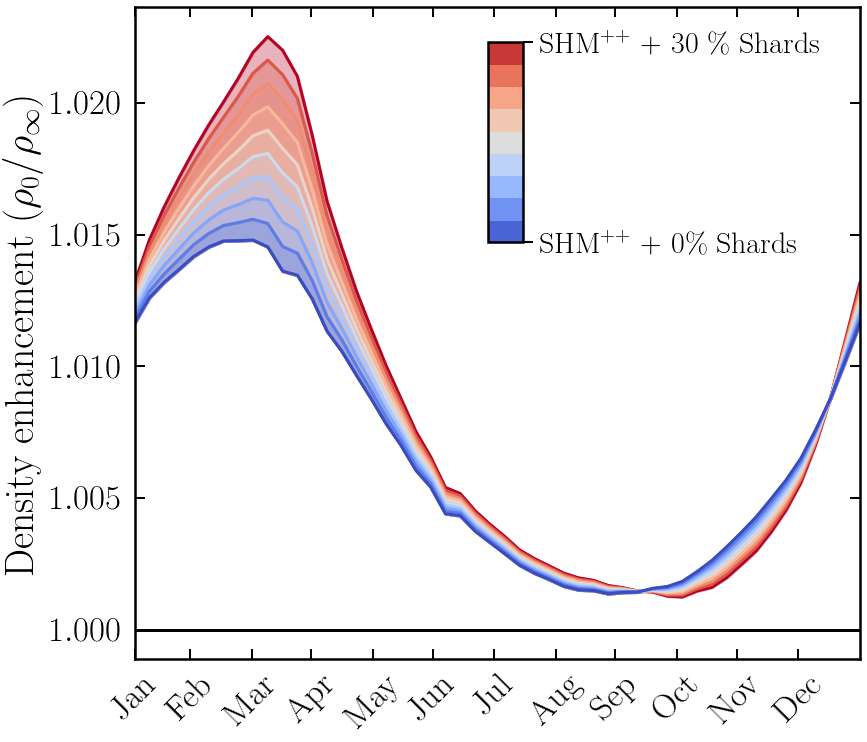

In [33]:
# Set up plot
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
pltname = 'Shards_GravFocusedDensity'

# Preallocate densities
rho0 = zeros(shape=ndays)
rho0_gf = zeros(shape=ndays)
rho = zeros(shape=ndays)
rho_gf = zeros(shape=ndays)
   
# Calculate density enhancement by integrating over f(v)
for i in range(0,ndays):
    rho0[i] = trapz(fv0[i,:],v)
    rho0_gf[i] = trapz(fv0_gf[i,:],v)

# Plot for each value of xi (shard fraction)
col = (cm.coolwarm(linspace(0,1,n_xi)))
for j in range(0,n_xi):
    ix = n_xi-1-j
    xi = xi_vals[ix]
    for i in range(0,ndays):
        rho[i] = trapz((1-xi)*fv0[i,:]+xi*fv[i,:],v)
        rho_gf[i] = trapz((1-xi)*fv0_gf[i,:]+xi*fv_gf[i,:],v)
    plt.fill_between(days,rho_gf,y2=rho0_gf,linewidth=3,color=col[ix,:],alpha=0.3)
    plt.plot(days,rho_gf,linewidth=3,color=col[ix,:])

# Plot 0-points (should be = 1)
for i in range(0,ndays):
    rho[i] = trapz(fv[i,:],v)
plt.plot(days,rho0,'--',color=col[0,:])
plt.plot(days,rho,'--',color=col[-1,:])

# rho = rho_0 line
plt.plot([0,365],[1,1],'k-',linewidth=3)

# Plot fiddling
plt.ylabel(r'Density enhancement ($\rho_0/\rho_\infty$)',fontsize=40)
plt.xlim([0,365])
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=35)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Show and save
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [16]:
# DM params
A = 23
m_chi = 10.0
sigma_p = 1.0e-45

# Energy range
n = 5000
E_th = 2.0
E_max = 50.0
E = logspace(log(0.01),log10(E_max),n)
v_min = MinimumWIMPSpeed(E,A,m_chi)

# Loop over times
ndays = 365
days = linspace(0,365,ndays)
dR0 = zeros(shape=(ndays,n))
dR = zeros(shape=(ndays,n))
R = zeros(shape=ndays)
R0 = zeros(shape=ndays)
dR0_gf = zeros(shape=(ndays,n))
dR_gf = zeros(shape=(ndays,n))
R_gf = zeros(shape=ndays)
R0_gf = zeros(shape=ndays)
for i in range(0,ndays):
    gmin0 = gvmin_Isotropic(v_min,days[i])
    gmin0_gf = gvmin_Isotropic(v_min,days[i],GravFocus=True)
    gmin_sub = zeros(shape=shape(gmin0))
    gmin_sub_gf = zeros(shape=shape(gmin0))
    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        gmin_sub += pops[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s)
        gmin_sub_gf += pops[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s,GravFocus=True)
        #gmin_sub += pops[isub]*gvmin_Isotropic(v_min,days[i],sig=sqrt(sum(sig_s**2.0))/6.0,v_shift=v_s)
    dR[i,:] = diffRecoilRate_SI(E,gmin_sub,A,sigma_p,m_chi,rho_0=0.55)
    dR_gf[i,:] = diffRecoilRate_SI(E,gmin_sub_gf,A,sigma_p,m_chi,rho_0=0.55)
    dR0[i,:] = diffRecoilRate_SI(E,gmin0,A,sigma_p,m_chi,rho_0=0.55)
    dR0_gf[i,:] = diffRecoilRate_SI(E,gmin0_gf,A,sigma_p,m_chi,rho_0=0.55)
    R[i] = trapz(dR[i,(E>E_th)],E[E>E_th])
    R_gf[i] = trapz(dR[i,(E>E_th)],E[E>E_th])

    R0[i] = trapz(dR0[i,(E>E_th)],E[E>E_th])
    R0_gf[i] = trapz(dR0_gf[i,(E>E_th)],E[E>E_th])
    print i
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

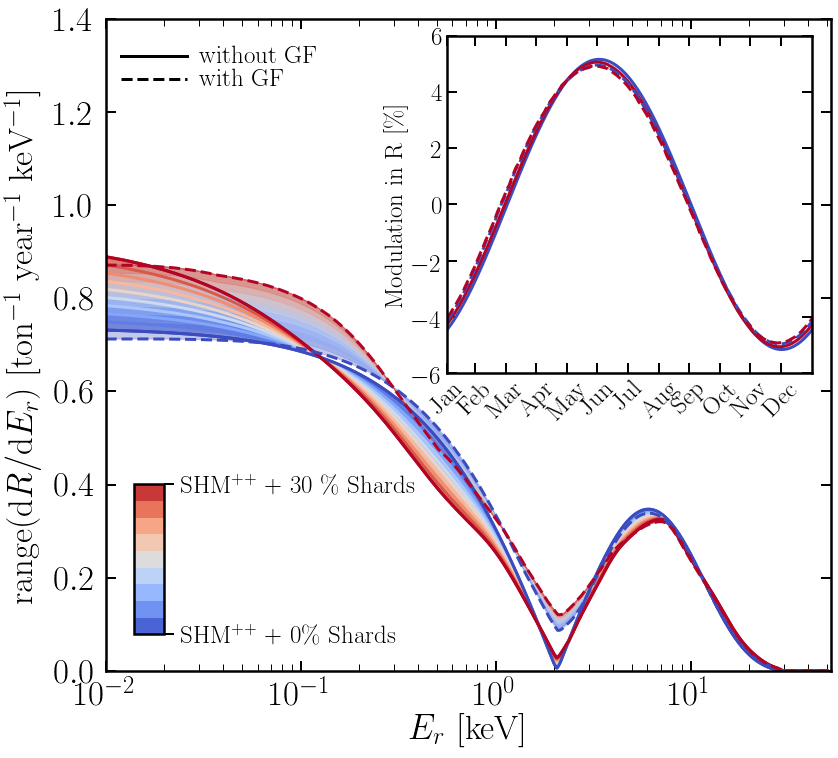

In [17]:
import matplotlib.gridspec as gridspec

Rdiff = zeros(shape=n)
Rdiff0 = zeros(shape=n)
Rdiff_gf = zeros(shape=n)
Rdiff0_gf = zeros(shape=n)
for i in range(0,n):
    Rdiff[i] = max(dR[:,i])-min(dR[:,i])
    Rdiff0[i] = max(dR0[:,i])-min(dR0[:,i])
    Rdiff_gf[i] = max(dR_gf[:,i])-min(dR_gf[:,i])
    Rdiff0_gf[i] = max(dR0_gf[:,i])-min(dR0_gf[:,i])

# Figure
pltname = 'Shards_annualmod_gravfocus'
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
left, bottom, width, height = [0.49, 0.47, 0.39, 0.39]
ax2 = fig.add_axes([left, bottom, width, height])

col = (cm.coolwarm(linspace(0,1,n_xi)))

n_xi = 10
xi_vals = linspace(0,0.3,n_xi)

# Main plot
plt.sca(ax1)
y2 = xi_vals[-1]*Rdiff+(1-xi_vals[-1])*Rdiff0
y2_gf = xi_vals[-1]*Rdiff_gf+(1-xi_vals[-1])*Rdiff0_gf
for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,'-',color=col[i,:],linewidth=3)
    
plt.plot(E,Rdiff0,label=cbar_max,linewidth=3,color=col[0,:])
plt.plot(E,y2,label=cbar_min,linewidth=3,color=col[-1,:])


for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff_gf+(1-xi_vals[i])*Rdiff0_gf,y2=y2_gf,color=col[i,:],alpha=0.3)
plt.plot(E,Rdiff0_gf,'--',label=cbar_max,linewidth=3,color=col[0,:])
plt.plot(E,y2_gf,'--',label=cbar_min,linewidth=3,color=col[-1,:])

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel(r"$E_r$ [keV]",fontsize=35);
plt.ylabel(r"range($\textrm{d}R/\textrm{d}E_r$) [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]" ,fontsize=35,labelpad=10);
ax1.set_xlim(left=0.01)
ax1.set_ylim(bottom=0.0,top=1.4)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax1.set_xscale('log')

# second "legend"
ax1.plot([0.012,0.026],[1.32,1.32], 'k-',linewidth=3)
ax1.plot([0.012,0.026],[1.27,1.27], 'k--',linewidth=3)
ax1.text(0.03,1.35-0.045,'without GF',fontsize=25)
ax1.text(0.03,1.3-0.045,'with GF',fontsize=25)





# Inset plot
plt.sca(ax2)
ymax = 6

R0mid = (max(R0)+min(R0))/2.0
Rmid = (max(R)+min(R))/2.0
R0mid_gf = (max(R0_gf)+min(R0_gf))/2.0
Rmid_gf = (max(R_gf)+min(R_gf))/2.0
y2 = 100*xi_vals[-1]*(R-Rmid)/Rmid+100*(1.0-xi_vals[-1])*(R0-R0mid)/R0mid
y2_gf = 100*xi_vals[-1]*(R_gf-Rmid_gf)/Rmid_gf+100*(1.0-xi_vals[-1])*(R0_gf-R0mid_gf)/R0mid_gf

#for i in range(0,n_xi):
    #dR = 100*xi_vals[i]*(R-Rmid)/Rmid+100*(1.0-xi_vals[i])*(R0-R0mid)/R0mid
    #plt.fill_between(days,dR,y2=y2,color=col[i,:],alpha=0.5)
    #plt.plot(days,dR,'-',color=col[i,:],linewidth=3)
plt.plot(days,100*(R0-R0mid)/R0mid,linewidth=3,color=col[0,:])
plt.plot(days,y2,linewidth=3,color=col[-1,:])
plt.plot(days,100*(R0_gf-R0mid_gf)/R0mid_gf,'--',linewidth=3,color=col[0,:])
plt.plot(days,y2_gf,'--',linewidth=3,color=col[-1,:])
#diffR = 100*(R0-R0mid)/R0mid
#plt.plot([days[argmax(diffR)],days[argmax(diffR)]],[-ymax,amax(diffR)],'--',color=col[0,:])
#plt.plot([days[argmax(y2)],days[argmax(y2)]],[-ymax,amax(y2)],'--',color=col[-1,:])

#diffR_gf = 100*(R0_gf-R0mid_gf)/R0mid_gf
#plt.plot([days[argmax(diffR_gf)],days[argmax(diffR_gf)]],[-ymax,amax(diffR_gf)],'--',color=col[0,:])
#plt.plot([days[argmax(y2_gf)],days[argmax(y2_gf)]],[-ymax,amax(y2_gf)],'--',color=col[-1,:])


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax2.set_xlim(left=0.0,right=365)
ax2.set_ylim(bottom=-ymax,top=ymax)
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
plt.ylabel(r"Modulation in R [\%]" ,fontsize=25);
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax2, width="15%", height="30%", bbox_to_anchor=[-20, -200, 200, 500]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

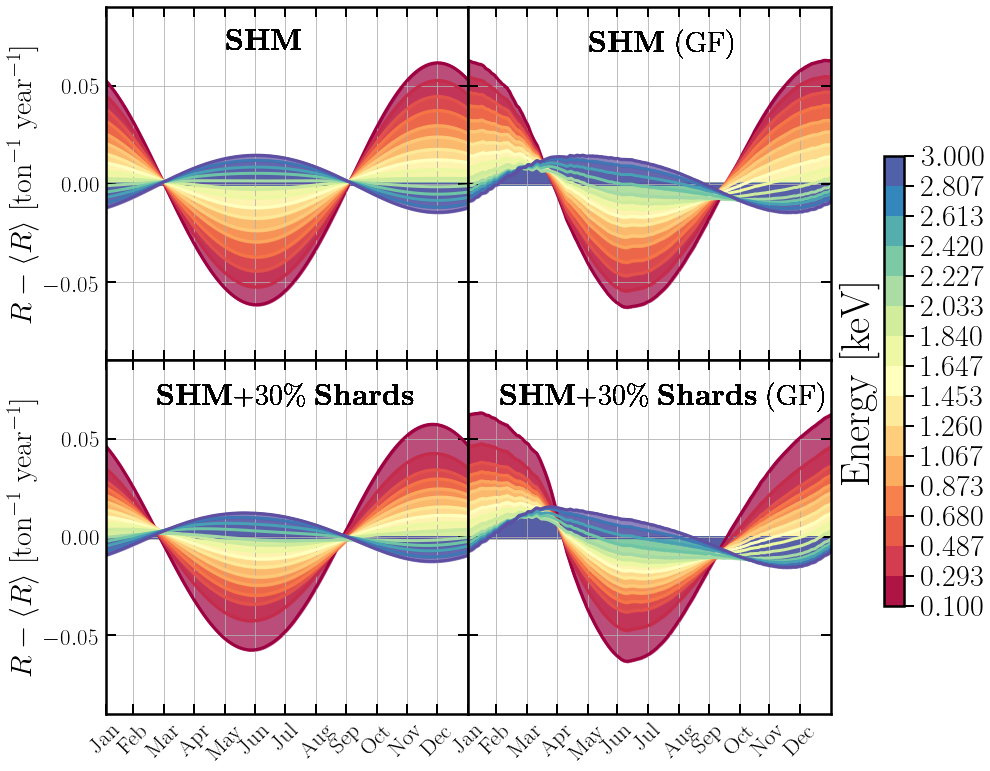

In [18]:
import matplotlib.gridspec as gridspec

nbins = 15
bin_edges = linspace(0.1,3.0,nbins+1)

def bin_dR(fdR):
    Rbin = zeros(shape=(ndays,nbins))
    for i in range(0,ndays):
        for j in range(0,nbins):
            E1 = bin_edges[j]
            E2 = bin_edges[j+1]
            Ec = E[(E>E1)&(E<E2)]
            dRc = fdR[i,(E>E1)&(E<E2)]
            Rbin[i,j] = trapz(dRc,Ec)
    return Rbin

Rbin0 = bin_dR(dR0)
Rbin0_gf = bin_dR(dR0_gf)
Rbin = bin_dR((1-0.3)*dR0+0.3*dR)
Rbin_gf = bin_dR((1-0.3)*dR0_gf+0.3*dR_gf)

# Set up subplots
fig, axarr = plt.subplots(2, 2,figsize=(13,13))
gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.0,wspace=0.0)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

ymax = 0.09
labelx = days[-1]/3.0
labely = 0.75*ymax

plt.sca(ax1)
colbins = (cm.Spectral(linspace(0,1,nbins)))
for i in range(0,nbins):
    yc = Rbin0[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31)
    plt.text(labelx,labely,r'{\bf SHM}',fontsize=30)
        
plt.sca(ax2)
for i in range(0,nbins):
    yc = Rbin0_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31)
    plt.text(labelx,labely,r'{\bf SHM} (GF)',fontsize=30)

plt.sca(ax3)
for i in range(0,nbins):
    yc = Rbin[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
    plt.text(labelx-70,labely,r'{\bf SHM}+30\% {\bf Shards}',fontsize=30)

plt.sca(ax4)
for i in range(0,nbins):
    yc = Rbin_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])   
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
    plt.text(labelx-90,labely,r'{\bf SHM}+30\% {\bf Shards} (GF)',fontsize=30)

    
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax1.set_xlim([0,days[-1]])
ax2.set_xlim([0,days[-1]])
ax3.set_xlim([0,days[-1]])
ax4.set_xlim([0,days[-1]])
ax1.set_ylim([-ymax,ymax])
ax2.set_ylim([-ymax,ymax])
ax3.set_ylim([-ymax,ymax])
ax4.set_ylim([-ymax,ymax])

# Custom colorbar
cbaxes = inset_axes(ax2, width="10%", height="90%", bbox_to_anchor=[720, 180, 200, 500]) 
norm = mpl.colors.Normalize(vmin=bin_edges[0],vmax=bin_edges[-1])
sm = plt.cm.ScalarMappable(cmap=cm.Spectral, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=bin_edges,boundaries=bin_edges,orientation='vertical')
f = plt.gcf().get_children()
cbar = f[5]
cbar.tick_params(labelsize=20) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7,labelsize=30)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
cbar.set_ylabel(r'Energy [keV]')
cbar.yaxis.label.set_size(40)
cbar.yaxis.set_label_position("left")
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=33)
ax2.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax3.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax4.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax4.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

ax1.set_ylabel(r'$R-\langle R\rangle$ [ton$^{-1}$ year$^{-1}$]',fontsize=30)
ax3.set_ylabel(r'$R-\langle R\rangle$ [ton$^{-1}$ year$^{-1}$]',fontsize=30)

plt.show()